# Titanic (Regression)

- https://www.kaggle.com/c/titanic/overview
- 출력을 csv파일로 저장하여 함께 제출
- submit predictions에 테스트해 볼 것!
- 어떠한 알고리즘을 사용하여도 무방함
- 참조: https://www.kaggle.com/alexisbcook/getting-started-with-titanic 주의! csv파일과 notebook 코드 모두를 제출하여야 한다.

In [1]:
import numpy as np 
import pandas as pd

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
train_test_data = [train, test] # train과 data 함께 수정하기 위해 선언

In [6]:
def bar_chart(feature): #각 항목들에서 얼마나 생존했는지 조사
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(7,3))

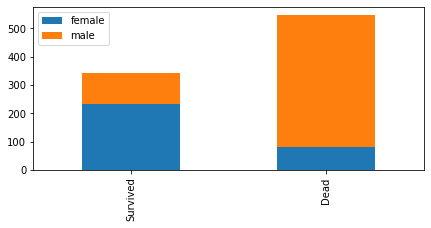

In [7]:
bar_chart('Sex')

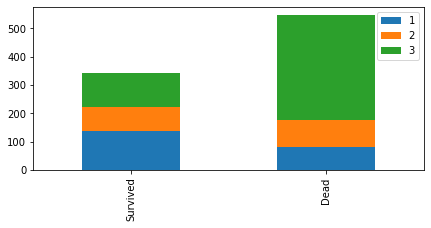

In [8]:
bar_chart('Pclass')

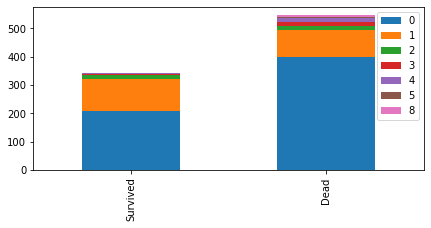

In [9]:
bar_chart('SibSp')

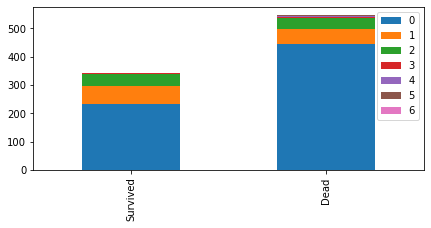

In [10]:
bar_chart('Parch')

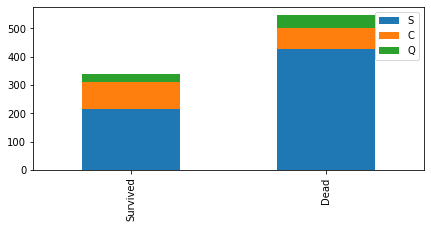

In [11]:
bar_chart('Embarked')

# Sex

In [12]:
sex_mapping = {"male": 0, "female": 1} #성별을 0과 1로 바꿔줌
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [13]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


# Age

In [14]:
for dataset in train_test_data: #Age의 NULL 평균으로
    dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean()) 

In [15]:
for dataset in train_test_data: # Age 0~9의 숫자로 대체
    dataset['Age'] = np.round(dataset['Age']/10)

In [16]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,4.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,3.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,4.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,4.0,0,0,373450,8.0500,NaN,S


# SibSp & Parch

In [20]:
#동승한 가족구성원의 숫자로 바꾸어 적용
for dataset in train_test_data:
    dataset['Family'] = (dataset['SibSp'] + dataset['Parch']) 

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,4.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",1,3.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,4.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",0,4.0,0,0,373450,8.0500,NaN,S,0


# Embarked

In [22]:
for dataset in train_test_data: #NULL 값 S로 대체
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [23]:
embarked_mapping = {'S':0, 'C':1, 'Q':2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [24]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,4.0,1,0,PC 17599,71.2833,C85,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,3.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,4.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",0,4.0,0,0,373450,8.0500,NaN,0,0


In [25]:
#중요도가 떨어지는 정보제거 , Fare은 Pclass 정보에 비해 중요도가 떨어진다 판단했음
train = train.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin', 'SibSp', 'Parch'], axis=1)
test = test.drop(['Name', 'Ticket', 'Fare', 'Cabin',  'SibSp', 'Parch'], axis=1)

In [26]:
train.head()

,Survived,Pclass,Sex,Age,Embarked,Family
0,0,3,0,2.0,0,1
1,1,1,1,4.0,1,1
2,1,3,1,3.0,0,0
3,1,1,1,4.0,0,1
4,0,3,0,4.0,0,0


In [27]:
test.head(5)

,PassengerId,Pclass,Sex,Age,Embarked,Family
0,892,3,0,3.0,2,0
1,893,3,1,5.0,0,1
2,894,2,0,6.0,2,0
3,895,3,0,3.0,0,0
4,896,3,1,2.0,0,2


# SVM 알고리즘

In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)#10개 스플릿 사용

In [34]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']
clf = SVC()

scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.79775281 0.80898876 0.80898876 0.85393258 0.80898876
 0.82022472 0.84269663 0.82022472 0.85393258]


In [35]:
round(np.mean(score)*100,2)

82.49

In [40]:
clf = SVC()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy() #필요없는 정보 삭제
prediction = clf.predict(test_data)

In [41]:
final_Titanic = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

final_Titanic.to_csv('final_Titanic.csv', index=False)